# 📖 Data Understanding: Analisis Komprehensif Dataset Iris

### Tujuan Proyek

Tahap ini bertujuan untuk melakukan pemahaman data (Data Understanding) secara mendalam pada **Dataset Iris**. Skenario yang digunakan adalah data Iris yang terpisah di dua sistem database berbeda dan perlu diintegrasikan sebelum dianalisis.

* **Database 1 (MySQL):** Menyimpan data `id`, `species`, dan pengukuran **sepal** (`sepal_length`, `sepal_width`).
* **Database 2 (PostgreSQL):** Menyimpan data `id`, `species`, dan pengukuran **petal** (`petal_length`, `petal_width`).

Tujuan kita adalah menggabungkan data ini, memverifikasi kualitasnya, dan melakukan analisis data eksploratif (EDA) untuk mendapatkan wawasan kunci.

### Dataset: Bunga Iris
Dataset ini adalah salah satu dataset paling terkenal dalam dunia machine learning. Berisi 150 sampel dari tiga spesies bunga Iris (*Setosa*, *Versicolor*, dan *Virginica*). Untuk setiap sampel, empat fitur diukur: panjang dan lebar kelopak (petal) dan daun mahkota (sepal).

![Tiga Spesies Iris](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c5/Iris_germanica_%28Purple_bearded_Iris%29%2C_Wakehurst_Place%2C_UK_-_Diliff.jpg/800px-Iris_germanica_%28Purple_bearded_Iris%29%2C_Wakehurst_Place%2C_UK_-_Diliff.jpg)

## Langkah 1: Pengumpulan & Integrasi Data 🤝

Langkah pertama adalah mengambil data dari kedua sumber dan menggabungkannya menjadi satu DataFrame yang utuh. Untuk tujuan demonstrasi ini, kita akan **mensimulasikan** pengambilan data ini dengan membuat dua DataFrame terpisah.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# --- Simulasi Pengambilan Data ---

# Memuat dataset Iris asli dari scikit-learn untuk data yang realistis
iris = load_iris()
df_full = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_full['species'] = [iris.target_names[i] for i in iris.target]
df_full['id'] = range(1, len(df_full) + 1)

# 1. Mensimulasikan data dari Database MySQL (Sepal) 🗄️
print("Simulasi data dari MySQL (Pengukuran Sepal)...")
df_mysql = df_full[['id', 'species', 'sepal length (cm)', 'sepal width (cm)']].copy()
# Mengubah nama kolom agar lebih sederhana
df_mysql.rename(columns={
    'sepal length (cm)': 'sepal_length',
    'sepal width (cm)': 'sepal_width'
}, inplace=True)
print(df_mysql.head())
print("-" * 50)


# 2. Mensimulasikan data dari Database PostgreSQL (Petal) 🐘
print("Simulasi data dari PostgreSQL (Pengukuran Petal)...")
df_postgres = df_full[['id', 'species', 'petal length (cm)', 'petal width (cm)']].copy()
# Mengubah nama kolom
df_postgres.rename(columns={
    'petal length (cm)': 'petal_length',
    'petal width (cm)': 'petal_width'
}, inplace=True)
print(df_postgres.head())
print("-" * 50)


# 3. Menggabungkan kedua DataFrame menjadi satu
print("Menggabungkan kedua dataset...")
df_iris = pd.merge(df_mysql, df_postgres, on=['id', 'species'], how='inner')

print("\nData berhasil digabungkan!")
print("Lima baris pertama dari data gabungan:")
display(df_iris.head())

Simulasi data dari MySQL (Pengukuran Sepal)...
   id species  sepal_length  sepal_width
0   1  setosa           5.1          3.5
1   2  setosa           4.9          3.0
2   3  setosa           4.7          3.2
3   4  setosa           4.6          3.1
4   5  setosa           5.0          3.6
--------------------------------------------------
Simulasi data dari PostgreSQL (Pengukuran Petal)...
   id species  petal_length  petal_width
0   1  setosa           1.4          0.2
1   2  setosa           1.4          0.2
2   3  setosa           1.3          0.2
3   4  setosa           1.5          0.2
4   5  setosa           1.4          0.2
--------------------------------------------------
Menggabungkan kedua dataset...

Data berhasil digabungkan!
Lima baris pertama dari data gabungan:


,id,species,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,2,setosa,4.9,3.0,1.4,0.2
2,3,setosa,4.7,3.2,1.3,0.2
3,4,setosa,4.6,3.1,1.5,0.2
4,5,setosa,5.0,3.6,1.4,0.2


## Langkah 2: Inspeksi & Verifikasi Data 🧐

Setelah data digabungkan, kita perlu memeriksa struktur, tipe data, dan kualitasnya secara keseluruhan.

### Informasi Dasar & Kualitas Data
Kita akan menggunakan `.info()` untuk mendapatkan ringkasan cepat tentang DataFrame, termasuk jumlah entri, kolom, nilai non-null, dan tipe data.

In [2]:
print("--- Informasi Dasar DataFrame ---")
df_iris.info()

--- Informasi Dasar DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            150 non-null    int64  
 1   species       150 non-null    object 
 2   sepal_length  150 non-null    float64
 3   sepal_width   150 non-null    float64
 4   petal_length  150 non-null    float64
 5   petal_width   150 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Interpretasi:**
* **Entri:** Terdapat **150 entri**, sesuai dengan standar dataset Iris.
* **Kolom:** Terdapat 6 kolom, sesuai dengan yang kita harapkan.
* **Nilai Non-Null:** Semua kolom memiliki 150 nilai non-null. Ini adalah berita bagus, artinya **tidak ada data yang hilang (missing values)**.
* **Tipe Data:** Tipe data sudah sesuai (`int64` untuk id, `object` untuk species, dan `float64` untuk pengukuran).

### Statistik Deskriptif
Fungsi `.describe()` memberikan ringkasan statistik untuk semua kolom numerik. Ini membantu kita memahami tendensi sentral, sebaran, dan rentang data.

In [3]:
print("--- Statistik Deskriptif Fitur Numerik ---")
display(df_iris.describe().round(2))

--- Statistik Deskriptif Fitur Numerik ---


,id,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00,150.00
mean,75.50,5.84,3.06,3.76,1.20
std,43.45,0.83,0.44,1.77,0.76
min,1.00,4.30,2.00,1.00,0.10
25%,38.25,5.10,2.80,1.60,0.30
50%,75.50,5.80,3.00,4.35,1.30
75%,112.75,6.40,3.30,5.10,1.80
max,150.00,7.90,4.40,6.90,2.50


**Interpretasi:**
* **Rata-rata (mean):** Kita bisa lihat rata-rata ukuran untuk setiap fitur. Contoh, `sepal_length` rata-rata adalah 5.84 cm.
* **Standar Deviasi (std):** Menunjukkan sebaran data. `petal_length` (std=1.77) memiliki sebaran yang jauh lebih besar daripada `petal_width` (std=0.76).
* **Min/Max:** Menunjukkan rentang nilai. `petal_length` bervariasi dari 1.0 cm hingga 6.9 cm, rentang yang sangat lebar.

### Distribusi Kelas (Spesies)
Penting untuk mengetahui apakah dataset kita seimbang atau tidak.

In [4]:
print("--- Distribusi Setiap Spesies ---")
print(df_iris['species'].value_counts())

--- Distribusi Setiap Spesies ---
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


**Interpretasi:**
Dataset ini **sangat seimbang**, dengan masing-masing dari tiga spesies memiliki tepat 50 sampel. Ini ideal untuk melatih model machine learning karena model tidak akan bias terhadap kelas tertentu.

## Langkah 3: Analisis Data Eksploratif (EDA) 📊

Pada tahap ini, kita menggunakan visualisasi untuk menemukan pola, hubungan, dan anomali dalam data.

### Hubungan Antar Fitur (Pair Plot)
*Pair plot* adalah cara yang fantastis untuk memvisualisasikan hubungan antara setiap pasang fitur dan melihat distribusi masing-masing fitur.

--- Membuat Pair Plot untuk Melihat Hubungan Antar Fitur ---


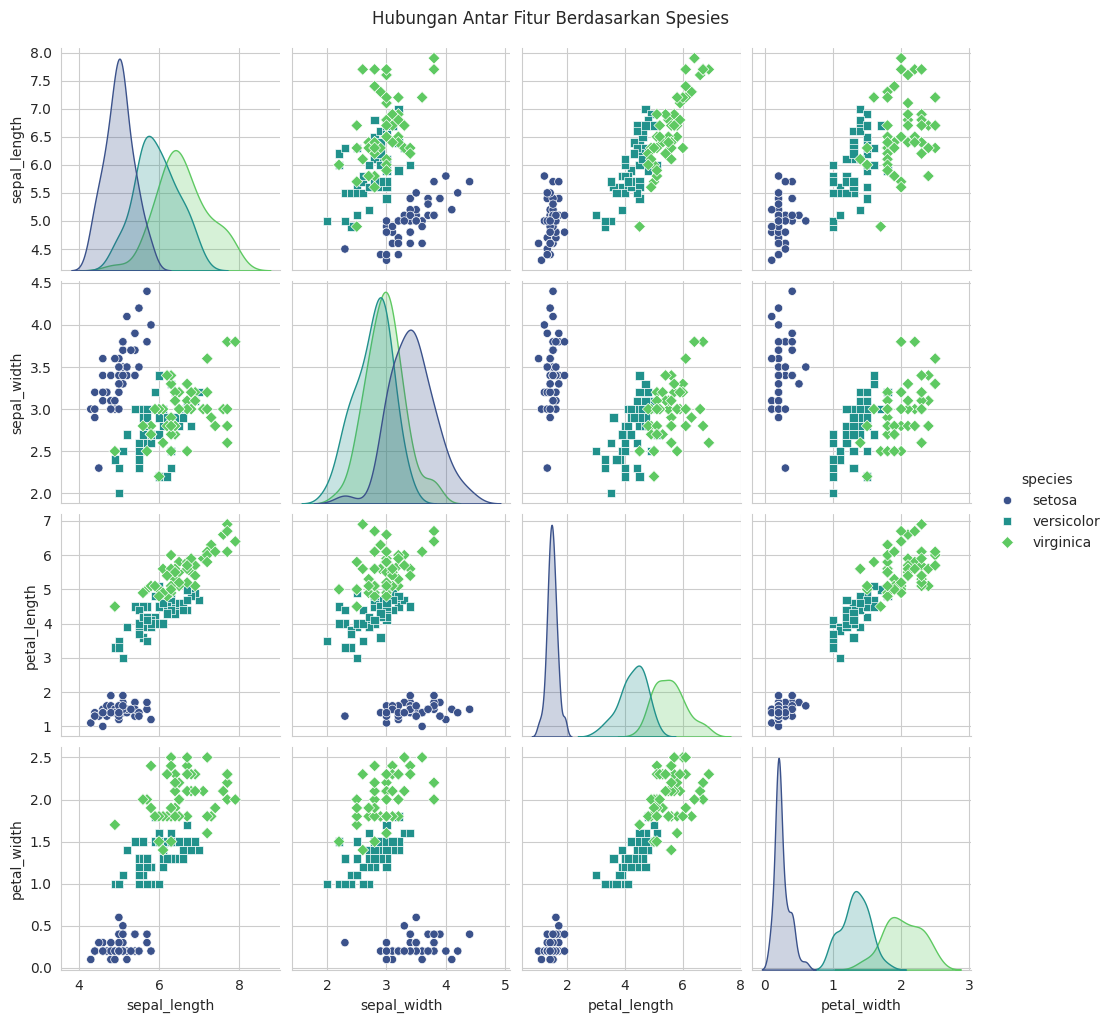

In [5]:
# Mengatur gaya plot
sns.set_style("whitegrid")

print("--- Membuat Pair Plot untuk Melihat Hubungan Antar Fitur ---")
sns.pairplot(df_iris.drop('id', axis=1), hue='species', palette='viridis', markers=["o", "s", "D"])
plt.suptitle('Hubungan Antar Fitur Berdasarkan Spesies', y=1.02)
plt.show()

**Wawasan dari Pair Plot:**
1.  **Pemisahan yang Jelas:** Spesies **`Iris-setosa`** (lingkaran biru) sangat mudah dipisahkan dari dua spesies lainnya berdasarkan pengukuran `petal_length` dan `petal_width`.
2.  **Tumpang Tindih:** Spesies **`Iris-versicolor`** (kotak hijau) dan **`Iris-virginica`** (diamond kuning) menunjukkan adanya tumpang tindih (overlap), terutama pada fitur sepal. Namun, mereka masih dapat dibedakan dengan cukup baik menggunakan fitur petal.
3.  **Korelasi Kuat:** Terdapat hubungan linear yang kuat antara `petal_length` dan `petal_width`. Saat panjang kelopak meningkat, lebarnya juga cenderung meningkat.

### Distribusi Fitur per Spesies (Box Plot)
*Box plot* sangat baik untuk membandingkan distribusi fitur di berbagai kategori (spesies).

/tmp/ipykernel_10748/918687343.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=col, data=df_iris, ax=axes[i//2, i%2], palette='viridis')
/tmp/ipykernel_10748/918687343.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=col, data=df_iris, ax=axes[i//2, i%2], palette='viridis')
/tmp/ipykernel_10748/918687343.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=col, data=df_iris, ax=axes[i//2, i%2], palette='viridis')
/tmp/ipykernel_10748/918687343.py:5: FutureWarning: 

Passing `palette` without

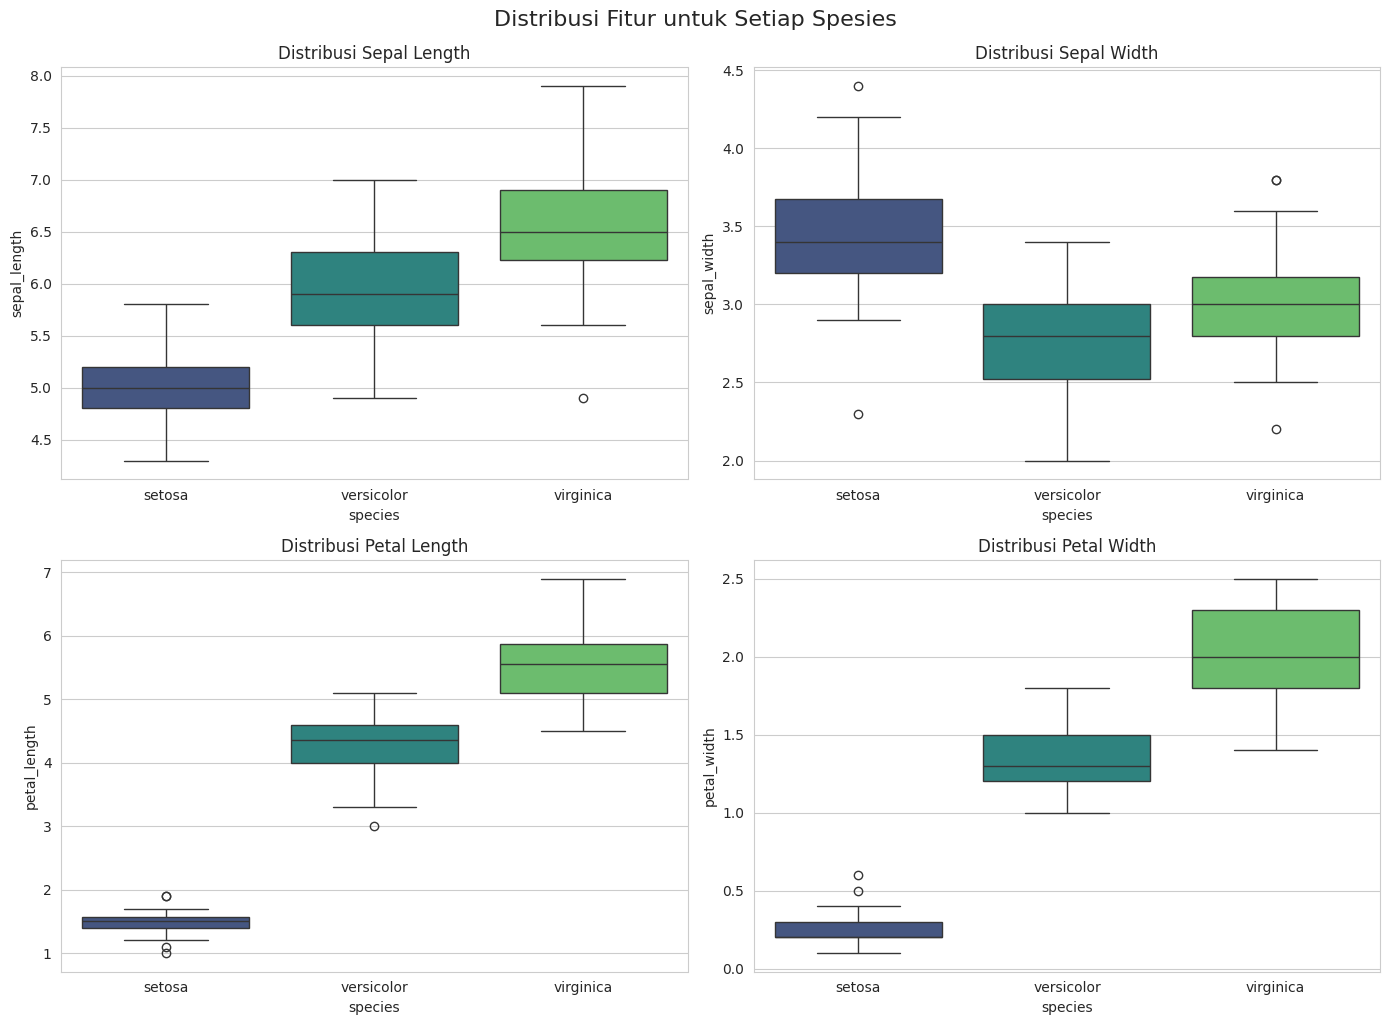

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Loop melalui setiap fitur numerik untuk membuat box plot
for i, col in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    sns.boxplot(x='species', y=col, data=df_iris, ax=axes[i//2, i%2], palette='viridis')
    axes[i//2, i%2].set_title(f'Distribusi {col.replace("_", " ").title()}', fontsize=12)

plt.tight_layout()
plt.suptitle('Distribusi Fitur untuk Setiap Spesies', fontsize=16, y=1.02)
plt.show()

**Wawasan dari Box Plot:**
* **Petal sebagai Pembeda Utama:** Box plot mengkonfirmasi bahwa `petal_length` dan `petal_width` adalah pembeda terbaik. Rentang nilai untuk *Setosa* sama sekali tidak tumpang tindih dengan dua spesies lainnya pada fitur petal.
* **Outlier:** Terdapat beberapa *outlier* (titik di luar "kumis" plot), misalnya pada `sepal_width` untuk *Virginica*. Ini adalah titik data yang mungkin perlu diselidiki lebih lanjut.
* **Sebaran:** *Setosa* memiliki sebaran (varians) yang paling kecil pada hampir semua fitur, menunjukkan bahwa bunga dalam spesies ini sangat seragam.

### Korelasi Antar Fitur Numerik (Heatmap)
Heatmap memberikan cara cepat untuk melihat kekuatan dan arah korelasi antar fitur.

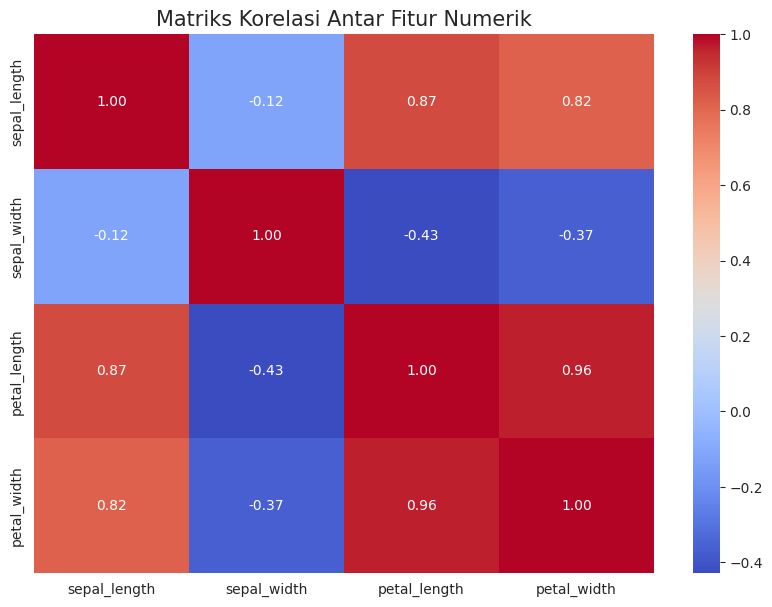

In [7]:
plt.figure(figsize=(10, 7))

# Menghitung korelasi hanya pada kolom numerik
numeric_df = df_iris.drop(['id', 'species'], axis=1)
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Antar Fitur Numerik', fontsize=15)
plt.show()

**Wawasan dari Heatmap:**
* **Korelasi Sangat Kuat (Positif):** `petal_width` dan `petal_length` memiliki korelasi sangat tinggi **(+0.96)**. `sepal_length` juga memiliki korelasi kuat dengan `petal_length` **(+0.87)** dan `petal_width` **(+0.82)**.
* **Korelasi Negatif:** `sepal_width` memiliki korelasi negatif yang sangat lemah dengan fitur lainnya, menunjukkan hampir tidak ada hubungan linear yang jelas.

## Ringkasan & Temuan Kunci 🎯

Setelah melakukan serangkaian analisis, berikut adalah temuan-temuan utama dari tahap Data Understanding:

1.  **Data Bersih & Lengkap:** Data berhasil diintegrasikan dari dua sumber simulasi, bersih dari nilai yang hilang, dan memiliki tipe data yang benar.
2.  **Dataset Seimbang:** Ketiga spesies Iris memiliki jumlah sampel yang sama (50 sampel), yang sangat baik untuk pemodelan.
3.  **Fitur Petal adalah Kunci:** `petal_length` dan `petal_width` adalah fitur yang paling informatif dan memiliki daya diskriminatif tertinggi untuk membedakan ketiga spesies.
4.  **Setosa Mudah Dipisahkan:** Spesies *Iris-setosa* dapat dipisahkan secara sempurna dari yang lain menggunakan aturan sederhana pada fitur petal.
5.  **Tantangan:** Tantangan utama dalam pemodelan nanti adalah membedakan secara akurat antara *Iris-versicolor* dan *Iris-virginica* yang menunjukkan beberapa kemiripan.